#  $\color{red}{\text{A. Preprocess}}$

###  $\color{blue}{\text{1. Importing Libs and custom Functions and Models}}$

In [1]:
#pip freeze > requirements.txt

In [2]:
import pandas as pd
import numpy as np
import sklearn
import tensorflow
import keras
print(pd.__version__)
print(np.__version__)
print(sklearn.__version__)
print(tensorflow.__version__)
print(keras.__version__)

1.3.3
1.24.3
1.2.1
2.9.1
2.9.0


In [3]:
# Impoting Lib.
import pandas as pd
import numpy as np
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)

In [12]:
import Lithofacies_Classification
from Lithofacies_Classification import Functions
from Lithofacies_Classification import Models
print('Version:', Lithofacies_Classification.__version__)
print('------------------------------------------')
print('subpackage:', Lithofacies_Classification.__subpackage__)
print('------------------------------------------')
print('Module in Functions subpackage:', Functions.__all__)
print('------------------------------------------')
print('Module in Models subpackage:', Models.__all__)

Version: 0.0.2
------------------------------------------
subpackage: ['Functions', 'Models']
------------------------------------------
Module in Functions subpackage: ['additional_functions', 'augmentation', 'formating', 'imputer', 'plotting', 'preprocessing', 'scaler']
------------------------------------------
Module in Models subpackage: ['CatBoost_model', 'DT_model', 'KNN_model', 'LightBoost_model', 'LR_model', 'NN_model', 'RF_model', 'SVM_model', 'XGB_model']


In [13]:
# Impoting customized Functions and Models
from Lithofacies_Classification.Functions.formating import formating_data
from Lithofacies_Classification.Functions.preprocessing import preprocess_data
from Lithofacies_Classification.Functions.imputer import regression_imputer
from Lithofacies_Classification.Functions.augmentation import features_augmentation
from Lithofacies_Classification.Functions.scaler import standardscaler

from Lithofacies_Classification.Functions.plotting import triple_combo, show_log, augmented_logs, litho_prediction
from Lithofacies_Classification.Functions.additional_functions import matrix_score, clf_rep, cm_plot, error_plot

In [14]:
from Lithofacies_Classification.Models.CatBoost_model import run_CatBoost
from Lithofacies_Classification.Models.DT_model import run_DT
from Lithofacies_Classification.Models.KNN_model import run_KNN
from Lithofacies_Classification.Models.LightBoost_model import run_LightBoost
from Lithofacies_Classification.Models.LR_model import run_LR
from Lithofacies_Classification.Models.NN_model import run_NN
from Lithofacies_Classification.Models.RF_model import run_RF
from Lithofacies_Classification.Models.SVM_model import run_SVM
from Lithofacies_Classification.Models.XGB_model import run_XGB
from Lithofacies_Classification.Models.Blender_model import run_Blender

###  $\color{blue}{\text{2. Importing data | Data formating(Remove and Label encoding)}}$

In [28]:
# Dataset in https://github.com/bolgebrygg/Force-2020-Machine-Learning-competition

raw_training = pd.read_csv('CSV_train.csv', sep=';')       #raw_training dataset
test_data = pd.read_csv('CSV_test.csv', sep=';')
test_labels = pd.read_csv('CSV_test_target.csv', sep=';')
raw_test = pd.merge(test_data, test_labels, on=['WELL', 'DEPTH_MD'])   #raw_test dataset
raw_hidden = pd.read_csv('CSV_hidden_test.csv', sep=';')   #raw_hidden dataset

print('Shape of datasets >>> train: {} | test: {} | hidden: {}'.format(raw_training.shape, raw_test.shape, raw_hidden.shape))

Shape of datasets >>> train: (1170511, 29) | test: (136786, 28) | hidden: (122397, 29)


In [29]:
#Data formating
training_form, test_form, hidden_form, le = formating_data(raw_training, raw_test, raw_hidden)
#print(le.classes_)

1- For traing|test|hidden dataset column rename from FORCE_2020_LITHOFACIES_LITHOLOGY to LITHO
2- Column FORCE_2020_LITHOFACIES_CONFIDENCE removed.
3- Label encoding process is done for lithology column.
Shape of datasets after formating >>> train: (1170511, 28) | test: (136786, 28) | hidden: (122397, 28)


###  $\color{blue}{\text{3. some preprocess on Data(such catgorical encoding and dropping unncesary cols)}}$

In [16]:
traindata_prep, testdata_prep, hiddendata_prep = preprocess_data(training_form, test_form, hidden_form)

G:\Pc\litho-venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Shape of datasets after preprocessing >>> train: (1170511, 25) | test: (136786, 25) | hidden: (122397, 25)
1- Dropping categorial features columns GROUP / FORMATION / WELL and add encoded columns GROUP_encoded	/ FORMATION_encoded /	WELL_encoded
2- Clustering by unsipervides K-Means algorithm


In [18]:
print((traindata_prep.isna().sum() / traindata_prep.shape[0] *100).round(decimals = 2))
# drop >>> ROP DTS DCAL RMIC 

Cluster              0.00
DEPTH_MD             0.00
X_LOC                0.92
Y_LOC                0.92
Z_LOC                0.92
CALI                 7.51
RSHA                46.12
RMED                 3.33
RDEP                 0.94
RHOB                13.78
GR                   0.00
NPHI                34.61
PEF                 42.62
DTC                  6.91
SP                  26.16
BS                  41.68
ROP                 54.29
DTS                 85.08
DCAL                74.47
DRHO                15.60
RMIC                84.95
LITHO                0.00
GROUP_encoded        0.00
FORMATION_encoded    0.00
WELL_encoded         0.00
dtype: float64


###  $\color{blue}{\text{4. imputer}}$

In [19]:
training_imputed, test_imputed, hidden_imputed = regression_imputer(traindata_prep, testdata_prep, hiddendata_prep)

Number of Nan data is >>> tarin 6330263 | test753954 | hidden572439
-----------------------------------------PREDINCTING DTS------------------------------------------


G:\Pc\litho-venv\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


-----------------------EXTREME BOOST REGRESSOR MODEL-----------------------
[0]	validation_0-rmse:185.87624
[100]	validation_0-rmse:18.02031
[200]	validation_0-rmse:26.93679
[211]	validation_0-rmse:26.08286
--------TRAINING SET METRICS--------
    explianed varianve 0.9668672687450472,
    maximum error 213.28781127929688, 
    root mean squared error 12.986150548807235, 
    maximum absolute error 7.341391524131467,
    R2 0.9667905976012239
-------VALIDATION SET METRICS-------
    explianed varianve 0.963129548020138,
    maximum error 218.88494873492186, 
    root mean squared error13.570491696222975, 
    maximum absolute error 7.530159215635803,
    R2 0.9630704619695644
-----------TEST SET METRICS----------
    explianed varianve 0.9223859317886938,
    maximum error 164.28207397710935, 
    root mean squared error 17.747852252664927, 
    maximum absolute error 11.470536796955992,
    R2 0.9210721374167268
-----------------------CATBOOST REGRESSOR MODEL-----------------------
Le

[249]	validation_0-rmse:5.09116
--------TRAINING SET METRICS--------
    explianed varianve 0.9850720788957639,
    maximum error 122.50057983546873, 
    root mean squared error 3.6644332296453035, 
    maximum absolute error 2.3194185563865246,
    R2 0.9850720787014049
-------VALIDATION SET METRICS-------
    explianed varianve 0.9846010862639505,
    maximum error 109.38357544425781, 
    root mean squared error3.7211366191691293, 
    maximum absolute error 2.332723881048282,
    R2 0.9846008477888666
-----------TEST SET METRICS----------
    explianed varianve 0.9653752986508566,
    maximum error 48.603996271875005, 
    root mean squared error 5.089023818940217, 
    maximum absolute error 3.5791036526534716,
    R2 0.9651450214518554
-----------------------CATBOOST REGRESSOR MODEL-----------------------


Learning rate set to 0.127177
0:	learn: 26.6165614	test: 24.2947414	best: 24.2947414 (0)	total: 143ms	remaining: 2m 22s
100:	learn: 4.7339079	test: 4.8554281	best: 4.8554281 (100)	total: 2.34s	remaining: 20.8s
200:	learn: 4.0894059	test: 4.6710941	best: 4.6215725 (169)	total: 4.42s	remaining: 17.6s
300:	learn: 3.7642240	test: 4.6282996	best: 4.5962364 (255)	total: 6.53s	remaining: 15.2s
bestTest = 4.596236383
bestIteration = 255
Shrink model to first 256 iterations.
--------TRAINING SET METRICS--------
    explianed varianve 0.9832219874075167,
    maximum error 118.14258746639831, 
    root mean squared error 3.884878157446358, 
    maximum absolute error 2.5186404339163246,
    R2 0.9832219874007458
-------VALIDATION SET METRICS-------
    explianed varianve 0.9828937558366125,
    maximum error 109.35439519266254, 
    root mean squared error3.921984619456107, 
    maximum absolute error 2.5235010539861102,
    R2 0.982893649990018
-----------TEST SET METRICS----------
    explianed

Learning rate set to 0.127177
0:	learn: 26.6165614	test: 24.2947414	best: 24.2947414 (0)	total: 144ms	remaining: 2m 23s
100:	learn: 4.7339079	test: 4.8554281	best: 4.8554281 (100)	total: 2.31s	remaining: 20.5s
200:	learn: 4.0894059	test: 4.6710941	best: 4.6215725 (169)	total: 4.38s	remaining: 17.4s
300:	learn: 3.7642240	test: 4.6282996	best: 4.5962364 (255)	total: 6.55s	remaining: 15.2s
bestTest = 4.596236383
bestIteration = 255
Shrink model to first 256 iterations.


###  $\color{blue}{\text{5. Feature augmentation}}$

In [18]:
training_aug, test_aug, hidden_aug = features_augmentation(training_imputed, test_imputed, hidden_imputed)

--------------------------------Creating additional features--------------------------------
Shape of datasets after agumation >>> train: (1170511, 39) | test: (136786, 39) | hidden: (122397, 39)
Features included in the datasets: Index(['Cluster', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI', 'RSHA',
       'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP',
       'DTS', 'DCAL', 'DRHO', 'RMIC', 'LITHO', 'GROUP_encoded',
       'FORMATION_encoded', 'WELL_encoded', 'DTS_pred', 'DTS_COMB',
       'NPHI_pred', 'NPHI_COMB', 'RHOB_pred', 'RHOB_COMB', 'DTC_pred',
       'DTC_COMB', 'S_I', 'P_I', 'DT_R', 'G', 'K', 'MD_TVD'],
      dtype='object')


In [19]:
# Inspecting dataframe after augmentation
training_aug.head()

,Cluster,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,SP,BS,ROP,DTS,DCAL,DRHO,RMIC,LITHO,GROUP_encoded,FORMATION_encoded,WELL_encoded,DTS_pred,DTS_COMB,NPHI_pred,NPHI_COMB,RHOB_pred,RHOB_COMB,DTC_pred,DTC_COMB,S_I,P_I,DT_R,G,K,MD_TVD
0,1,494.53,437641.97,6470972.50,-469.50,19.48,NaN,1.61,1.80,1.88,80.20,NaN,20.92,161.13,24.61,NaN,34.64,NaN,NaN,-0.57,NaN,10,6,-1,0,351.67,351.67,0.51,0.51,1.91,1.88,164.92,161.13,5357.85,11693.49,0.46,15235511.64,52257225.57,1.05
1,1,494.68,437641.97,6470972.50,-469.65,19.47,NaN,1.62,1.80,1.89,79.26,NaN,19.38,160.60,23.90,NaN,34.64,NaN,NaN,-0.57,NaN,10,6,-1,0,351.67,351.67,0.51,0.51,1.90,1.89,164.92,160.60,5373.79,11766.83,0.46,15280855.65,52891867.37,1.05
2,1,494.83,437641.97,6470972.50,-469.81,19.47,NaN,1.63,1.80,1.90,74.82,NaN,22.59,160.17,23.92,NaN,34.78,NaN,NaN,-0.57,NaN,10,6,-1,0,352.48,352.48,0.51,0.51,1.90,1.90,166.17,160.17,5380.50,11840.42,0.45,15264654.07,53569536.17,1.05
3,1,494.98,437641.97,6470972.50,-469.96,19.46,NaN,1.62,1.80,1.89,72.88,NaN,32.19,160.15,23.79,NaN,39.97,NaN,NaN,-0.59,NaN,10,6,-1,0,350.44,350.44,0.51,0.51,1.91,1.89,166.35,160.15,5398.71,11813.42,0.46,15405623.93,53224165.04,1.05
4,1,495.14,437641.97,6470972.50,-470.11,19.45,NaN,1.60,1.80,1.88,71.73,NaN,38.50,160.13,24.10,NaN,57.48,NaN,NaN,-0.60,NaN,10,6,-1,0,350.44,350.44,0.51,0.51,1.90,1.88,164.92,160.13,5364.82,11740.80,0.46,15308896.83,52909294.99,1.05


###  $\color{blue}{\text{6. Data Scaling}}$

In [20]:
train_scaled, test_scaled, hidden_scaled = standardscaler(training_aug, test_aug, hidden_aug)

In [6]:
#train_scaled.to_csv('./saved_step_one/train_scaled.csv')
#test_scaled.to_csv('./saved_step_one/test_scaled.csv')
#hidden_scaled.('./saved_step_one/hidden_scaled.csv')
#train_scaled = pd.read_csv('./saved_step_one/train_scaled.csv').drop('Unnamed: 0', axis=1)
#test_scaled = pd.read_csv('./saved_step_one/test_scaled.csv').drop('Unnamed: 0', axis=1)
#hidden_scaled = pd.read_csv('./saved_step_one/hidden_scaled.csv').drop('Unnamed: 0', axis=1)

#  $\color{red}{\text{B. Fit Models and Evaluation - XGBoost}}$

###  $\color{blue}{\text{1. EXTREME GRADIENT BOOSTING MODEL (XGB)}}$

In [21]:
train_pred_xgb, test_pred_xgb, hidden_pred_xgb = run_XGB(train_scaled, test_scaled, hidden_scaled)

G:\Pc\litho-venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:49:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:49:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:2.25076
[100]	validation_0-mlogloss:0.52450
[200]	validation_0-mlogloss:0.44836
[300]	validation_0-mlogloss:0.41334
[400]	validation_0-mlogloss:0.39022
[500]	validation_0-mlogloss:0.37369
[600]	validation_0-mlogloss:0.36087
[700]	validation_0-mlogloss:0.34964
[800]	validation

G:\Pc\litho-venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:12:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:12:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:2.25103
[100]	validation_0-mlogloss:0.52912
[200]	validation_0-mlogloss:0.45314
[300]	validation_0-mlogloss:0.41757
[400]	validation_0-mlogloss:0.39413
[500]	validation_0-mlogloss:0.37788
[600]	validation_0-mlogloss:0.36408
[700]	validation_0-mlogloss:0.35283
[800]	validation

G:\Pc\litho-venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:35:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:2.25092
[100]	validation_0-mlogloss:0.52257
[200]	validation_0-mlogloss:0.44652
[300]	validation_0-mlogloss:0.41114
[400]	validation_0-mlogloss:0.38860
[500]	validation_0-mlogloss:0.37170
[600]	validation_0-mlogloss:0.35899
[700]	validation_0-mlogloss:0.34755
[800]	validation

G:\Pc\litho-venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:58:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:58:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:2.25069
[100]	validation_0-mlogloss:0.52510
[200]	validation_0-mlogloss:0.44914
[300]	validation_0-mlogloss:0.41388
[400]	validation_0-mlogloss:0.39089
[500]	validation_0-mlogloss:0.37469
[600]	validation_0-mlogloss:0.36122
[700]	validation_0-mlogloss:0.35009
[800]	validation

G:\Pc\litho-venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:21:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:21:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:2.25090
[100]	validation_0-mlogloss:0.52508
[200]	validation_0-mlogloss:0.44871
[300]	validation_0-mlogloss:0.41393
[400]	validation_0-mlogloss:0.39167
[500]	validation_0-mlogloss:0.37502
[600]	validation_0-mlogloss:0.36129
[700]	validation_0-mlogloss:0.34975
[800]	validation

G:\Pc\litho-venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:44:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:44:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:2.25086
[100]	validation_0-mlogloss:0.52715
[200]	validation_0-mlogloss:0.45071
[300]	validation_0-mlogloss:0.41490
[400]	validation_0-mlogloss:0.39248
[500]	validation_0-mlogloss:0.37548
[600]	validation_0-mlogloss:0.36161
[700]	validation_0-mlogloss:0.35080
[800]	validation

G:\Pc\litho-venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:07:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:07:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:2.25076
[100]	validation_0-mlogloss:0.52455
[200]	validation_0-mlogloss:0.44763
[300]	validation_0-mlogloss:0.41351
[400]	validation_0-mlogloss:0.39101
[500]	validation_0-mlogloss:0.37473
[600]	validation_0-mlogloss:0.36102
[700]	validation_0-mlogloss:0.34956
[800]	validation

G:\Pc\litho-venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:30:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:30:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:2.25099
[100]	validation_0-mlogloss:0.52799
[200]	validation_0-mlogloss:0.45098
[300]	validation_0-mlogloss:0.41561
[400]	validation_0-mlogloss:0.39272
[500]	validation_0-mlogloss:0.37542
[600]	validation_0-mlogloss:0.36223
[700]	validation_0-mlogloss:0.35133
[800]	validation

G:\Pc\litho-venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:53:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:53:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:2.25057
[100]	validation_0-mlogloss:0.52346
[200]	validation_0-mlogloss:0.44756
[300]	validation_0-mlogloss:0.41280
[400]	validation_0-mlogloss:0.39023
[500]	validation_0-mlogloss:0.37344
[600]	validation_0-mlogloss:0.35939
[700]	validation_0-mlogloss:0.34837
[800]	validation

G:\Pc\litho-venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:16:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:16:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:2.25051
[100]	validation_0-mlogloss:0.52673
[200]	validation_0-mlogloss:0.44940
[300]	validation_0-mlogloss:0.41387
[400]	validation_0-mlogloss:0.39081
[500]	validation_0-mlogloss:0.37420
[600]	validation_0-mlogloss:0.35996
[700]	validation_0-mlogloss:0.34890
[800]	validation

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
from Lithofacies_Classification.Functions.additional_functions import matrix_score

# selected features to be used while training
selected_fetures_xgb = ['RDEP', 'GR', 'NPHI_COMB', 'G', 'P_I', 'DTC', 'DTS_COMB', 'RSHA',
                        'DT_R', 'RHOB', 'K', 'DCAL', 'Y_LOC', 'Cluster', 'GROUP_encoded',
                        'WELL_encoded', 'FORMATION_encoded', 'DEPTH_MD', 'Z_LOC', 'CALI', 'BS',
                        'X_LOC', 'RMED', 'PEF', 'SP', 'MD_TVD', 'RMIC', 'DRHO']
x_train = train_scaled[selected_fetures_xgb]
y_train = train_scaled['LITHO']
x_test = test_scaled[selected_fetures_xgb]
y_test = test_scaled['LITHO']
x_hidden = hidden_scaled[selected_fetures_xgb]
y_hidden = hidden_scaled['LITHO']

split = 10
kf = StratifiedKFold(n_splits=split, shuffle=True)
train_prob_xgb1 = np.zeros((len(x_train), 12))
open_prob_xgb1 = np.zeros((len(x_test), 12))
hidden_prob_xgb1 = np.zeros((len(x_hidden), 12))
xgbmodel_noarg = XGBClassifier(n_estimators=1000, max_depth=4,
                               booster='gbtree', objective='multi:softprob',
                               learning_rate=0.075, random_state=42,
                               subsample=1, colsample_bytree=1,
                               tree_method='gpu_hist', predictor='gpu_predictor',
                               verbose=2020, reg_lambda=1500
                               )
i = 1
import joblib

for (train_index, test_index) in kf.split(x_train, y_train):
  X_train, X_test = x_train.iloc[train_index], x_train.iloc[test_index]
  Y_train, Y_test = y_train.iloc[train_index], y_train.iloc[test_index]
  xgbmodel_noarg.fit(X_train,
                     Y_train.values.ravel(),
                     early_stopping_rounds=100,
                     eval_set=[(X_test, Y_test)],
                     verbose=100
                     )

  filename = f"XGBoost_model_Fold{i}.json"
  xgbmodel_noarg.save_model(filename)
  prediction = xgbmodel_noarg.predict(X_test)
  print(f'Default score:', matrix_score(Y_test.values, prediction))
  print('Fold accuracy:', accuracy_score(Y_test, prediction))
  print(f'F1 is:', f1_score(prediction, Y_test, average="weighted"))
  print(f'-----------------------FOLD {i}---------------------')
  
  # stacking probabilities
  train_prob_xgb1 += xgbmodel_noarg.predict_proba(x_train)
  open_prob_xgb1 += xgbmodel_noarg.predict_proba(x_test)
  hidden_prob_xgb1 += xgbmodel_noarg.predict_proba(x_hidden)
  i += 1
# final lithology class prediction
train_prob_xgb1 = pd.DataFrame(train_prob_xgb1/split)
train_pred_xgb1 = np.array(pd.DataFrame(train_prob_xgb1).idxmax(axis=1))
open_prob_xgb1 = pd.DataFrame(open_prob_xgb1/split)
open_pred_xgb1 = np.array(pd.DataFrame(open_prob_xgb1).idxmax(axis=1))
hidden_prob_xgb1 = pd.DataFrame(hidden_prob_xgb1/split)
hidden_pred_xgb1 = np.array(pd.DataFrame(hidden_prob_xgb1).idxmax(axis=1))


G:\Pc\litho-venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:24:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:24:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:2.25072
[100]	validation_0-mlogloss:0.52765
[200]	validation_0-mlogloss:0.45039
[300]	validation_0-mlogloss:0.41578
[400]	validation_0-mlogloss:0.39304
[500]	validation_0-mlogloss:0.37657
[600]	validation_0-mlogloss:0.36279
[700]	validation_0-mlogloss:0.35163
[800]	validation

G:\Pc\litho-venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:03:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:03:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:2.25081
[100]	validation_0-mlogloss:0.52382
[200]	validation_0-mlogloss:0.44645
[300]	validation_0-mlogloss:0.41190
[400]	validation_0-mlogloss:0.38905
[500]	validation_0-mlogloss:0.37228
[600]	validation_0-mlogloss:0.35886
[700]	validation_0-mlogloss:0.34833
[800]	validation

C:\Users\esfahani\AppData\Local\Temp\ipykernel_9612\4045722391.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_zoom.set_xticklabels(class_names)
C:\Users\esfahani\AppData\Local\Temp\ipykernel_9612\4045722391.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_zoom.set_xticklabels(labels)


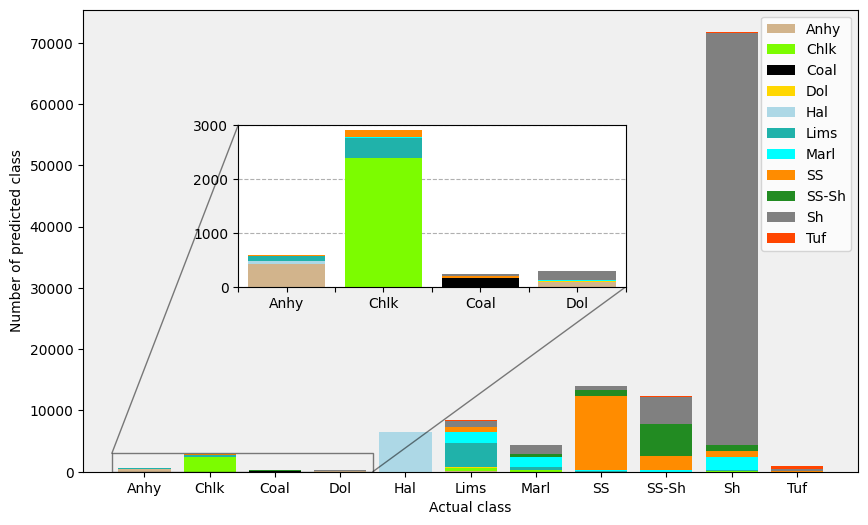

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

y_true = hidden_scaled.LITHO.values
y_pred = hidden_pred_xgb

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
class_names = np.array(['Anhy', 'Chlk', 'Coal', 'Dol', 'Hal', 'Lims', 'Marl', 'SS',
       'SS-Sh', 'Sh', 'Tuf'], dtype=object)
colors = ['tan', 'lawngreen', '#000000', 'gold', 'lightblue', 'lightseagreen', 'cyan', 'darkorange', '#228B22' , 'grey', '#FF4500']

support = np.sum(cm, axis=1)

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(len(class_names)):
    ax.bar(range(len(support)), cm[:, i], bottom=np.sum(cm[:, :i], axis=1),color=colors[i],
            label=class_names[i], linewidth=0)
plt.xticks(range(len(support)), [class_names[i] for i in range(len(support))])
ax.set_xlabel('Actual class')
ax.set_ylabel('Number of predicted class')

# Display
ax.set_facecolor('#f0f0f0')

ax_zoom = ax.inset_axes([0.2, 0.4, 0.5, 0.35])

for i in range(len(class_names)):
    ax_zoom.bar(range(len(support)), cm[:, i], bottom=np.sum(cm[:, :i], axis=1),color=colors[i],
            label=class_names[i], linewidth=0)
ax_zoom.set_xticklabels(class_names)
labels = [item.get_text() for item in ax_zoom.get_xticklabels()]
labels[0] = ''; labels[1] = 'Anhy'; labels[2] = ''; labels[3] = 'Chlk'; labels[4] = ''; labels[5] = 'Coal'
labels[6] = ''; labels[7] = 'Dol'
ax_zoom.set_xticklabels(labels)

ax_zoom.set_xlim(-0.5, 3.5)
ax_zoom.set_ylim(0, 3000)
ax.indicate_inset_zoom(ax_zoom, edgecolor="black")


ax_zoom.set_axisbelow(True)
ax_zoom.grid(axis='y', linestyle='dashed')
ax.legend(fontsize="10", loc ="upper right")

plt.savefig('xgboost.pdf')
plt.show()


-----------------------TRAIN SET REPORT---------------------
Train set penalty matrix score: -0.2861635858185015
Accuracy score: 0.8914653514576113
Real Facies (l1): ['Anhy', 'Bsmt', 'Chlk', 'Coal', 'Dol', 'Hal', 'Lims', 'Marl', 'SS', 'SS-Sh', 'Sh', 'Tuf']
Pred Facies (l2): ['Anhy', 'Bsmt', 'Chlk', 'Coal', 'Dol', 'Hal', 'Lims', 'Marl', 'SS', 'SS-Sh', 'Sh', 'Tuf']
Not exist in l1 or l2: []
              precision    recall  f1-score   support

        Anhy       0.93      0.91      0.92      1085
        Bsmt       0.99      0.83      0.91       103
        Chlk       0.92      0.93      0.93     10513
        Coal       0.82      0.69      0.75      3820
         Dol       0.68      0.21      0.32      1688
         Hal       0.99      0.99      0.99      8213
        Lims       0.86      0.69      0.77     56320
        Marl       0.85      0.78      0.81     33329
          SS       0.87      0.85      0.86    168937
       SS-Sh       0.80      0.67      0.73    150455
          Sh 

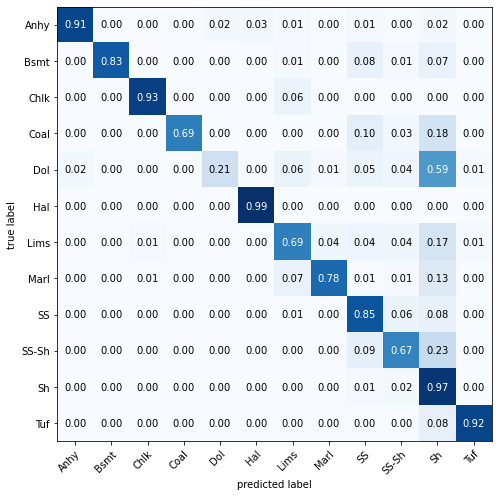

In [23]:
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
print('-----------------------TRAIN SET REPORT---------------------')
print('Train set penalty matrix score:', matrix_score(train_scaled.LITHO.values, train_pred_xgb))
print('Accuracy score:', accuracy_score(train_scaled.LITHO.values, train_pred_xgb))
print(clf_rep(train_scaled.LITHO.values, train_pred_xgb, le))
cm_plot(train_scaled.LITHO.values, train_pred_xgb, le)

-----------------------TEST SET REPORT---------------------
Test set penalty matrix score: -0.5205046569093328
Accuracy score: 0.7986562952348925
Real Facies (l1): ['Anhy', 'Chlk', 'Coal', 'Dol', 'Lims', 'Marl', 'SS', 'SS-Sh', 'Sh', 'Tuf']
Pred Facies (l2): ['Anhy', 'Coal', 'Lims', 'Marl', 'SS', 'SS-Sh', 'Sh', 'Tuf']
Not exist in l1 or l2: ['Chlk' 'Dol']


d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        Anhy       0.95      0.17      0.29       125
        Chlk       0.00      0.00      0.00       625
        Coal       0.77      0.60      0.67       690
         Dol       0.00      0.00      0.00       416
        Lims       0.51      0.51      0.51      4798
        Marl       0.67      0.14      0.23      3306
          SS       0.83      0.82      0.82     24048
       SS-Sh       0.58      0.31      0.40     17558
          Sh       0.83      0.95      0.89     83975
         Tuf       0.78      0.58      0.66      1245

    accuracy                           0.80    136786
   macro avg       0.59      0.41      0.45    136786
weighted avg       0.77      0.80      0.77    136786

None


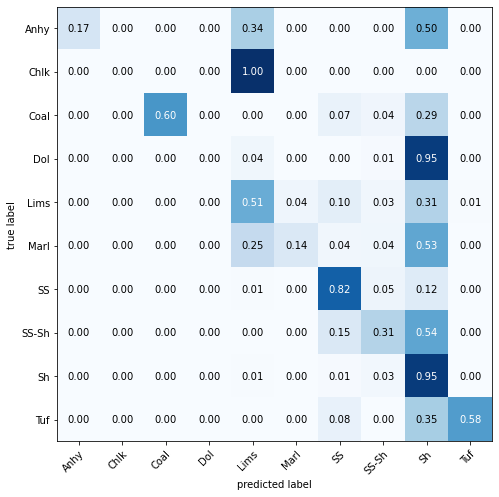

In [24]:
from sklearn.metrics import accuracy_score
print('-----------------------TEST SET REPORT---------------------')
print('Test set penalty matrix score:', matrix_score(test_scaled.LITHO.values, test_pred_xgb))
print('Accuracy score:', accuracy_score(test_scaled.LITHO.values, test_pred_xgb))
print(clf_rep(test_scaled.LITHO.values, test_pred_xgb, le))
cm_plot(test_scaled.LITHO.values, test_pred_xgb, le)

-----------------------HIDDEN SET REPORT---------------------
Hidden set penalty matrix score: -0.4432921150028187
Accuracy score: 0.8186965366798206
Real Facies (l1): ['Anhy', 'Chlk', 'Coal', 'Dol', 'Hal', 'Lims', 'Marl', 'SS', 'SS-Sh', 'Sh', 'Tuf']
Pred Facies (l2): ['Anhy', 'Chlk', 'Coal', 'Dol', 'Hal', 'Lims', 'Marl', 'SS', 'SS-Sh', 'Sh', 'Tuf']
Not exist in l1 or l2: []
              precision    recall  f1-score   support

        Anhy       0.71      0.71      0.71       597
        Chlk       0.75      0.83      0.79      2905
        Coal       0.78      0.71      0.74       244
         Dol       0.06      0.05      0.05       287
         Hal       0.99      0.99      0.99      6498
        Lims       0.77      0.48      0.60      8374
        Marl       0.26      0.36      0.30      4396
          SS       0.75      0.87      0.80     14045
       SS-Sh       0.69      0.43      0.53     12283
          Sh       0.89      0.94      0.91     71827
         Tuf       0.56    

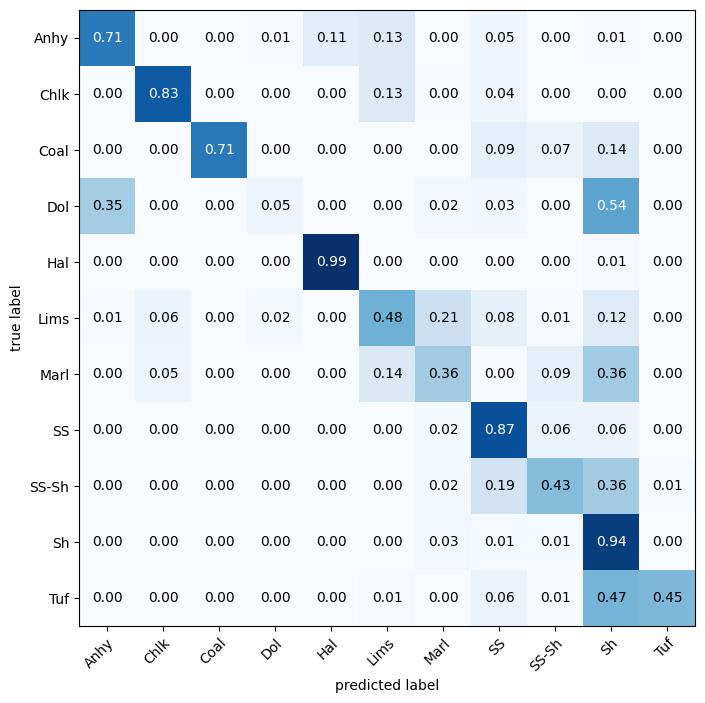

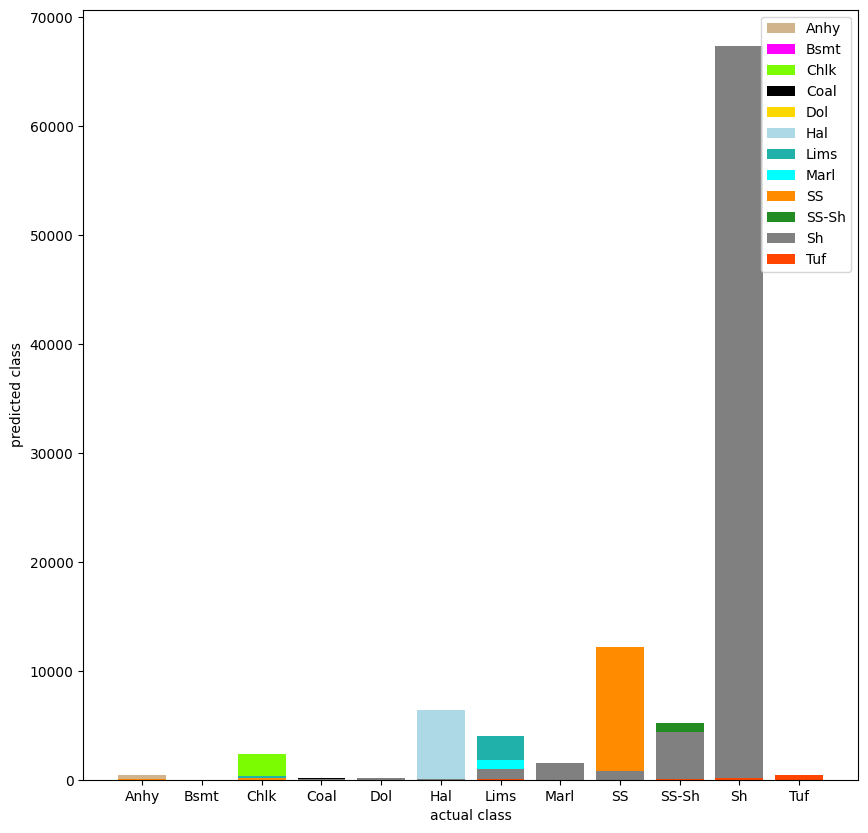

In [34]:
""""Plotting the classification report for the hidden test set
and the matrix penalty score.
"""
print('-----------------------HIDDEN SET REPORT---------------------')
print('Hidden set penalty matrix score:', matrix_score(hidden_scaled.LITHO.values, hidden_pred_xgb))
print('Accuracy score:', accuracy_score(hidden_scaled.LITHO.values, hidden_pred_xgb))
print(clf_rep(hidden_scaled.LITHO.values, hidden_pred_xgb, le))
cm_plot(hidden_scaled.LITHO.values, hidden_pred_xgb, le)
error_plot(hidden_scaled.LITHO.values, hidden_pred_xgb, le)

In [24]:
train_xgb_res = training_form.copy()
test_xgb_res = test_form.copy()
hidden_xgb_res = hidden_form.copy()

train_xgb_res['XGB_TM'] = train_pred_xgb
test_xgb_res['XGB_TM'] = test_pred_xgb
hidden_xgb_res['XGB_TM'] = hidden_pred_xgb

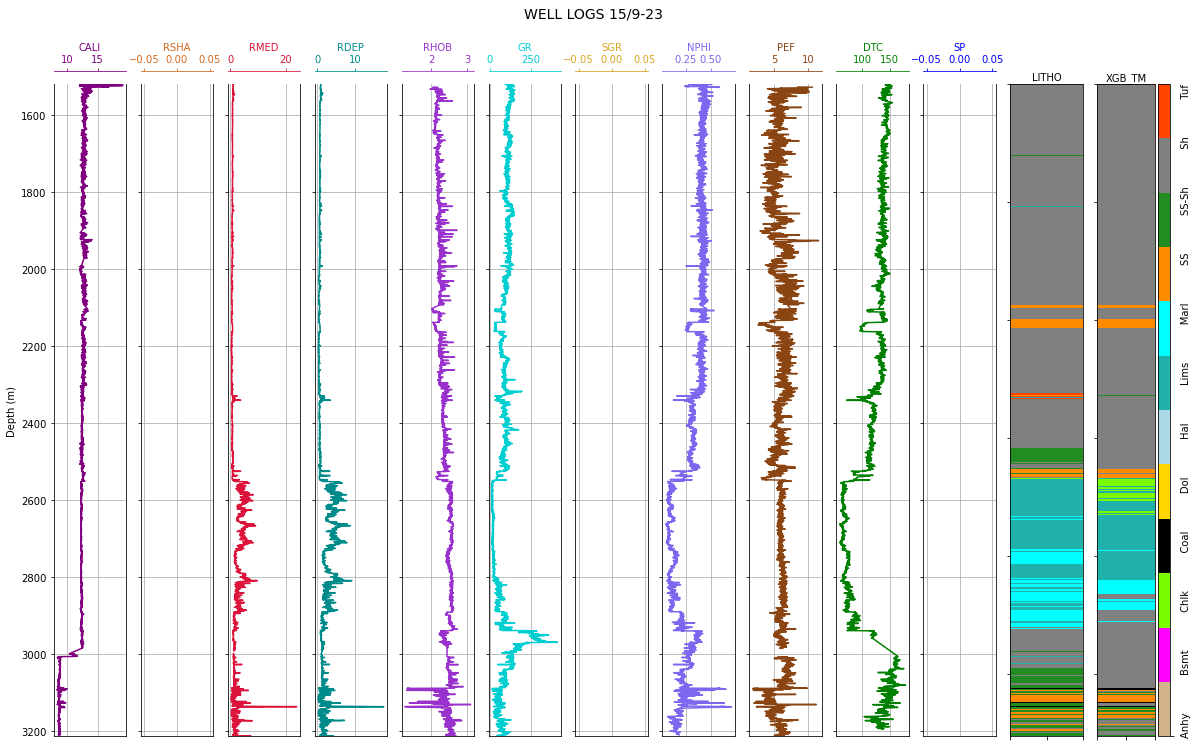

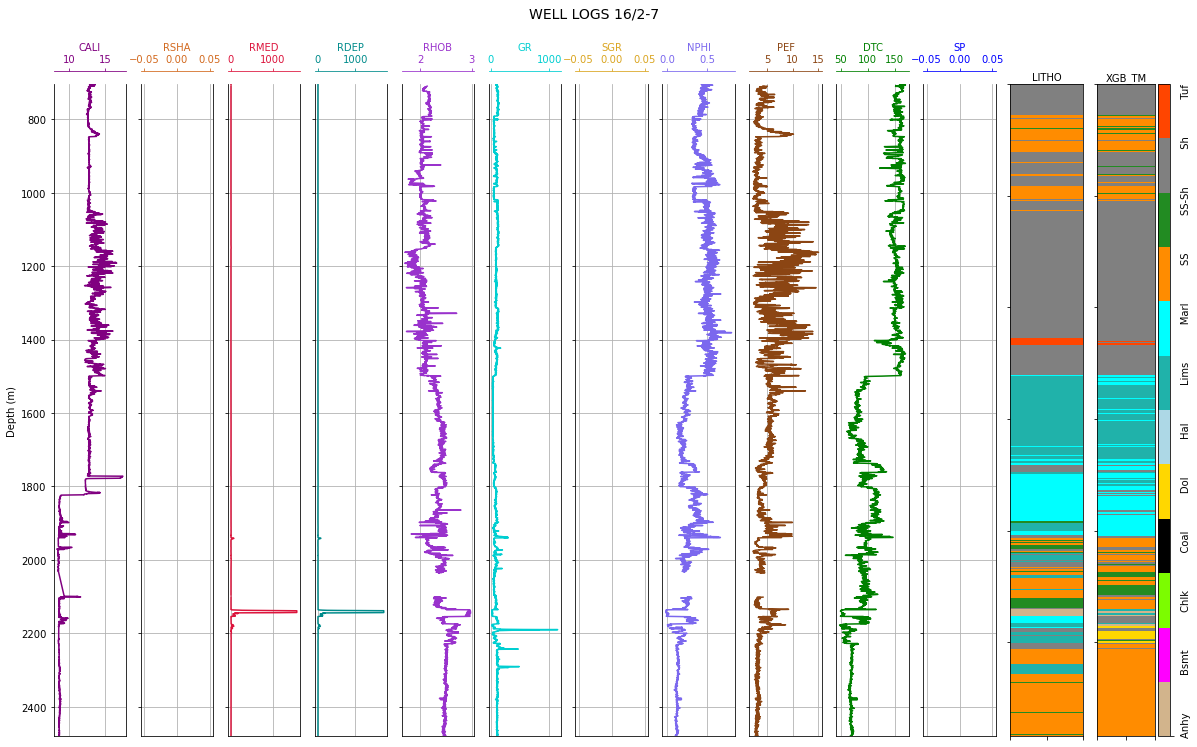

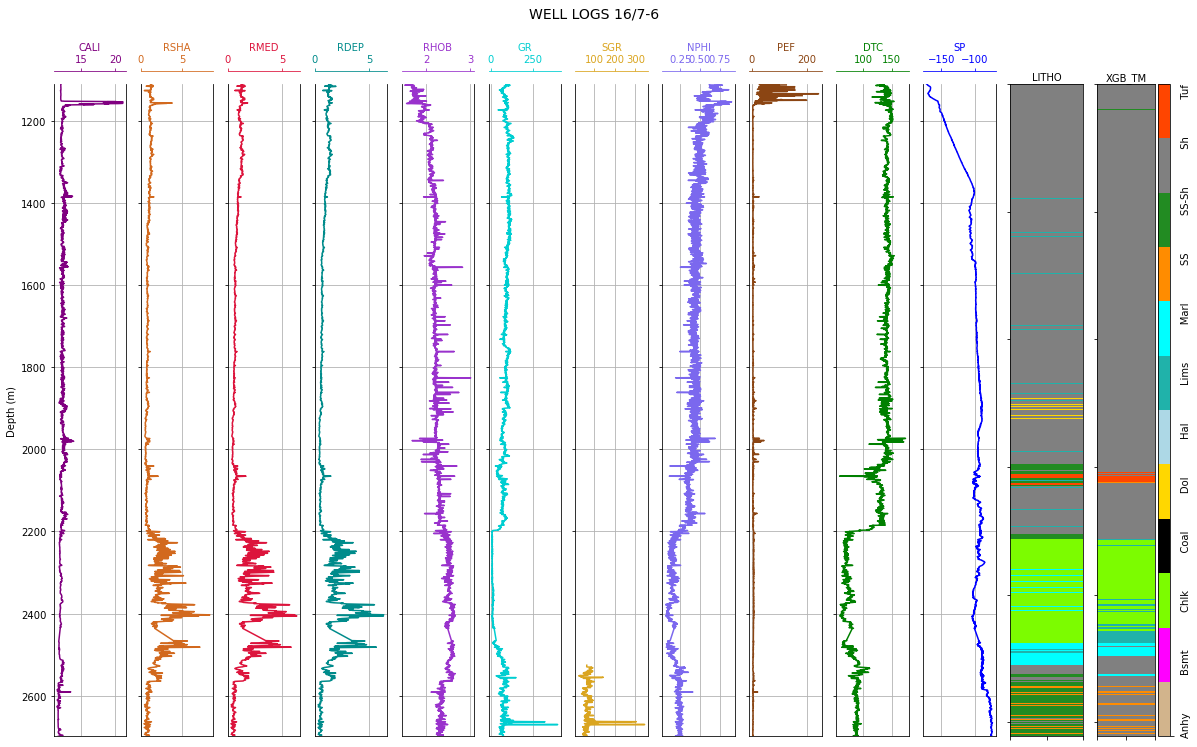

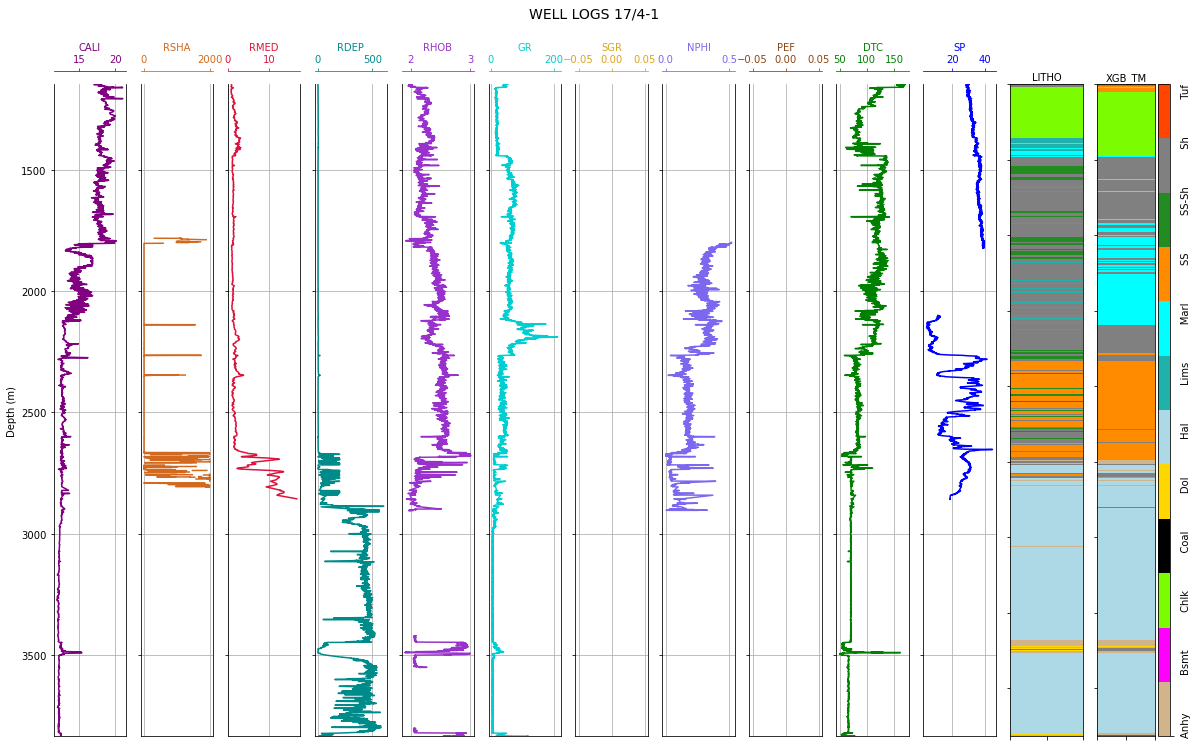

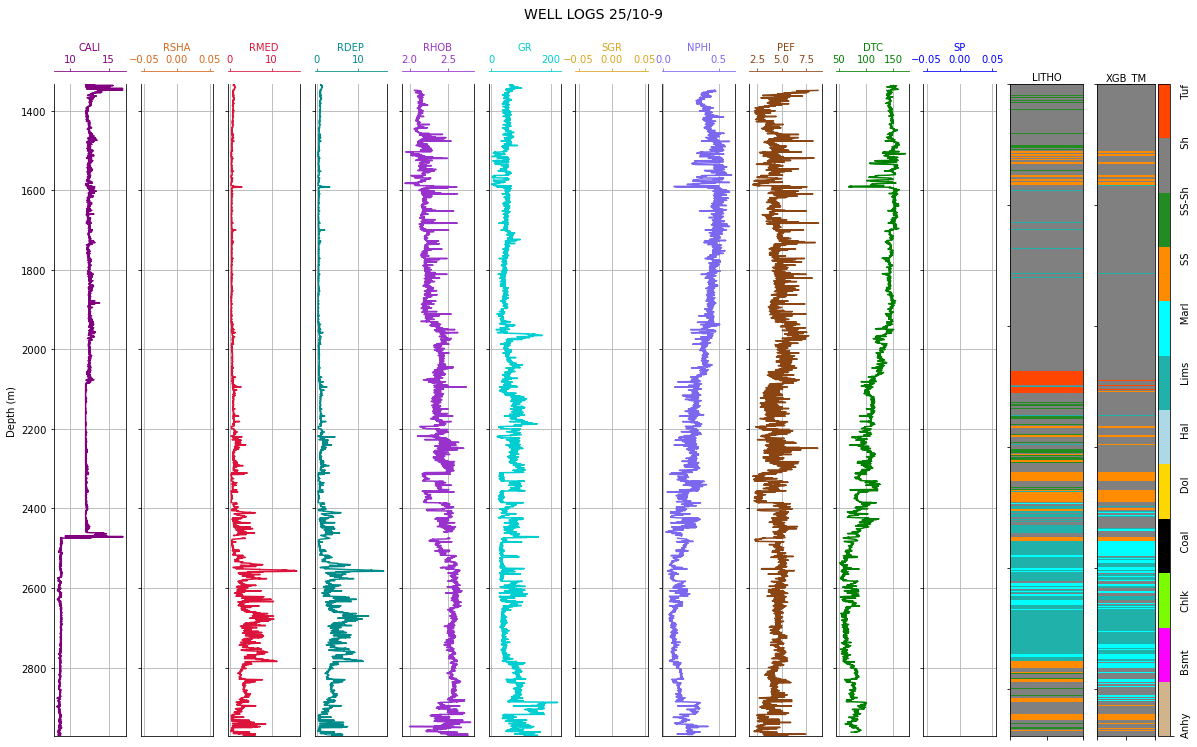

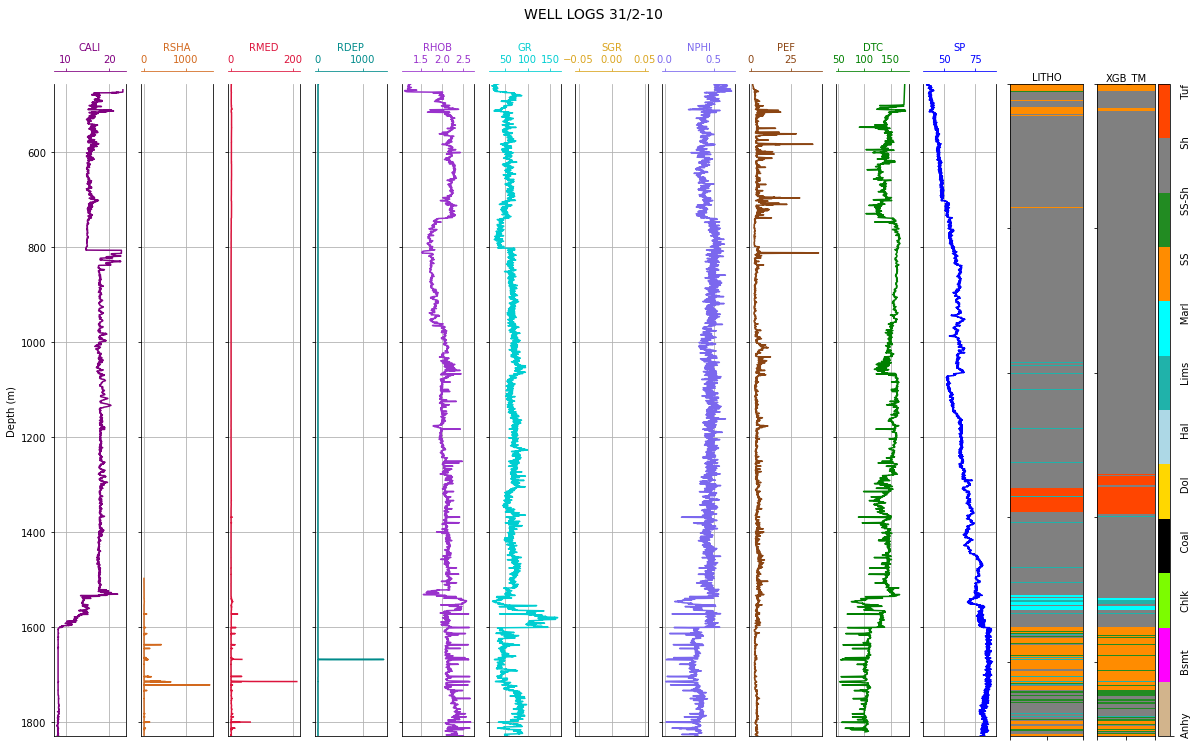

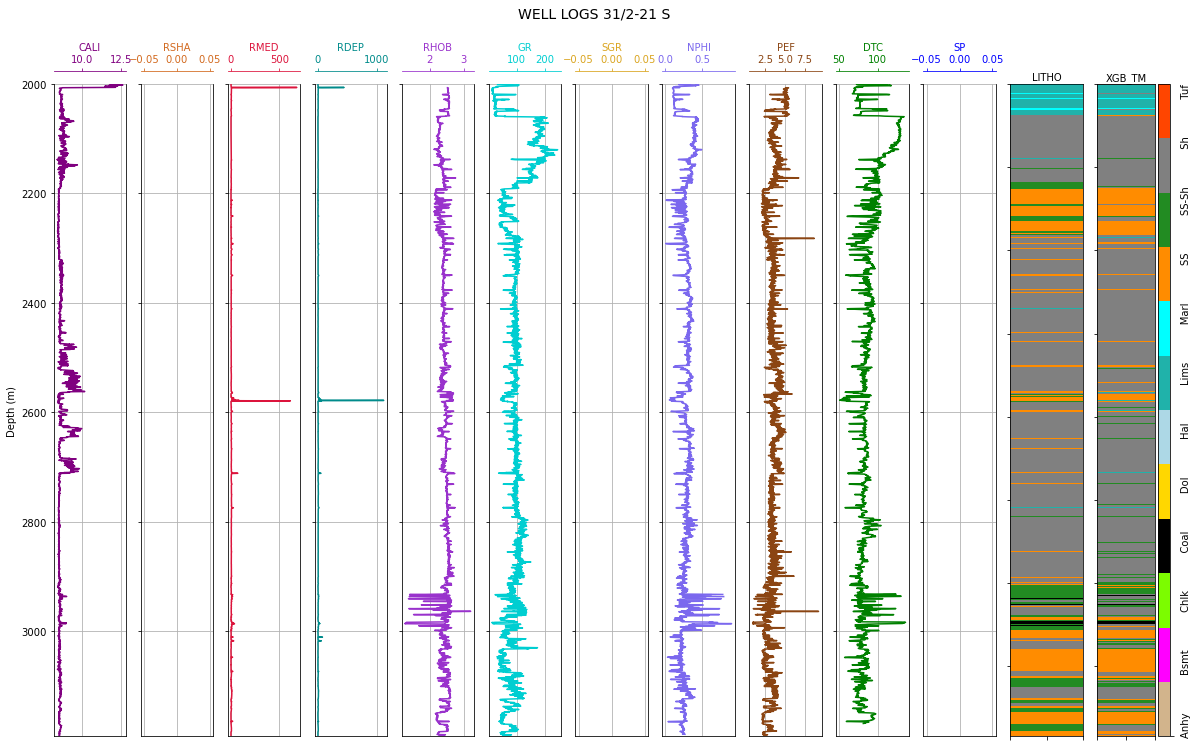

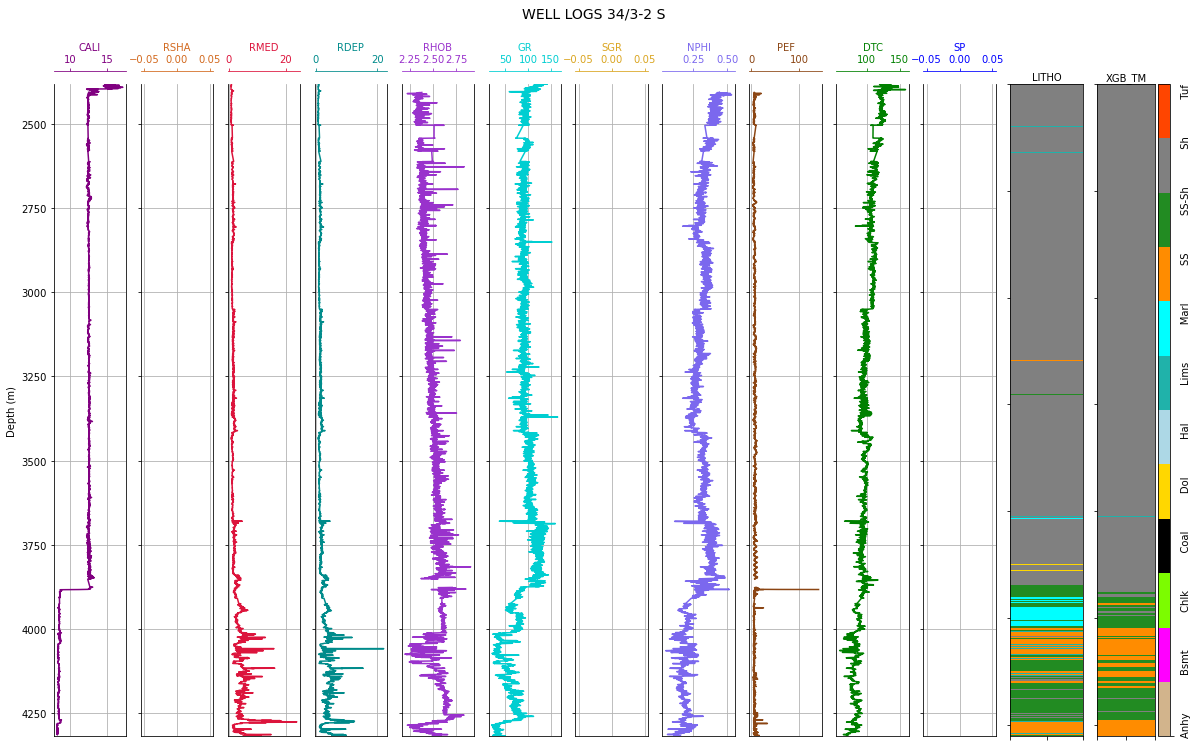

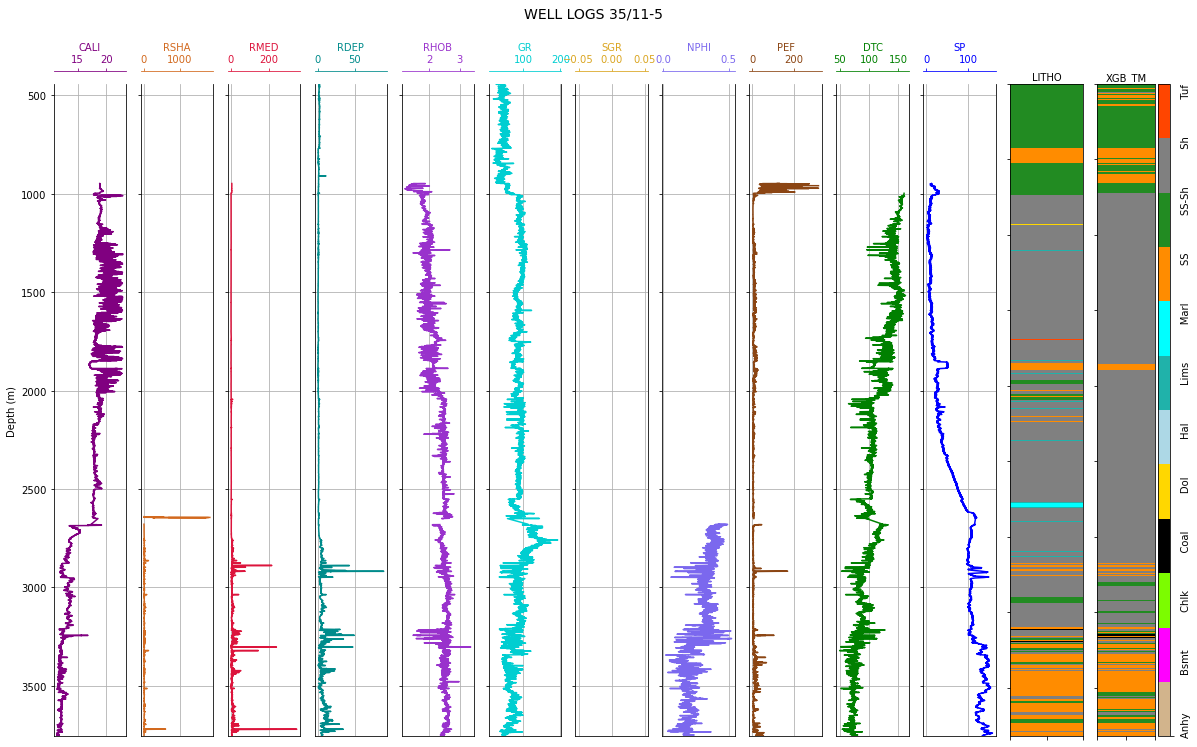

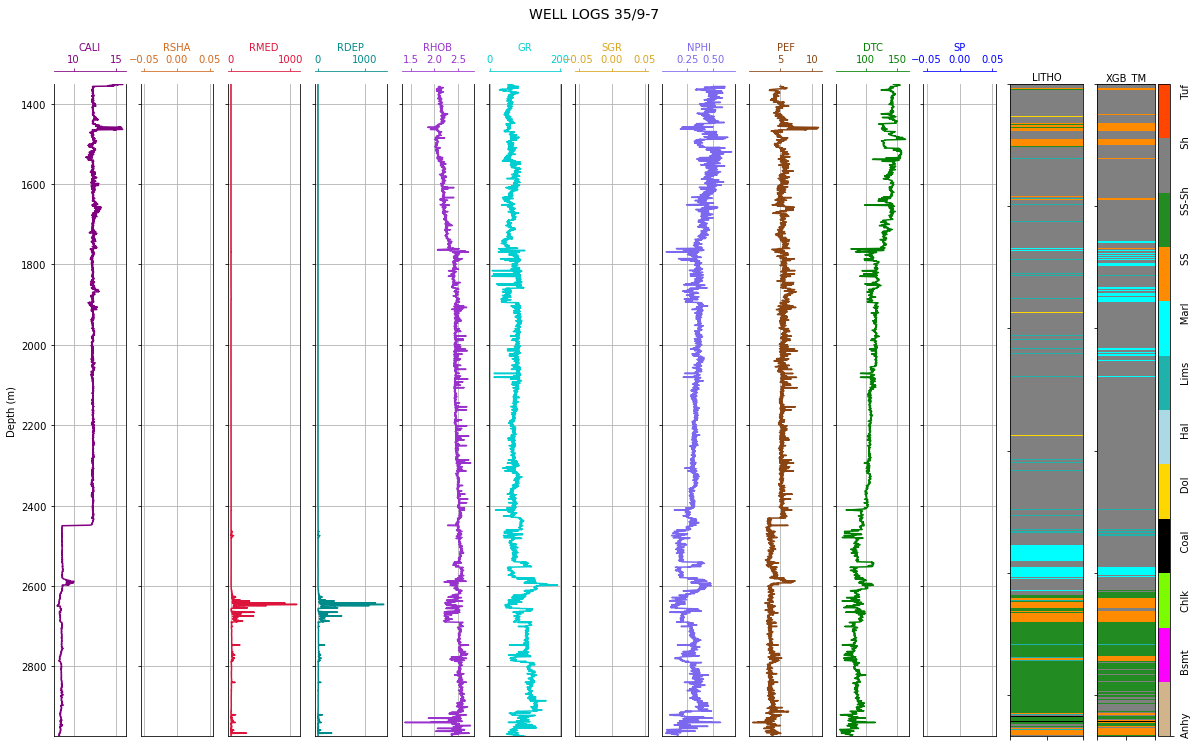

In [25]:
for i in range(0, 10):
  litho_prediction(hidden_xgb_res, i, 1, le)